# Includes

In [57]:
import random
import matplotlib.pyplot as plt
import math
from matplotlib.animation import FuncAnimation

# Initialisation des paramètres

In [58]:
Npop = 100
Sp = 2
alpha = 0.9
epsilon = 1e-6
Gmax = 200
pmut = 1
Ntour = 4
xmax = 10
xmin = -10

# Initialisation variables

In [59]:
pop_anim = []

population = []
best = []
worst = []
average = []
generation =[0]

# Création de la classe individu

In [60]:
class Individu:
    def __init__(self, x1, x2):
        self.x = [x1,x2]
        self.f = None

    def evaluation(self):
        # f1 : DeJong
        #self.f = self.x[0]**2 + self.x[1]**2 

        # f2 : DeJong
        #self.f = 100*(self.x[0]**2 - self.x[1])**2 + (1-self.x[0])**2

        # f3 : Rast
        #self.f = 2 + self.x[0]**2 - math.cos(2*math.pi*self.x[0]) + self.x[1]**2 - math.cos(2*math.pi*self.x[1])

        # f4 : Eas
        self.f = -math.cos(self.x[0])*math.cos(self.x[1])*math.exp(-(self.x[0]-math.pi)**2-(self.x[1]-math.pi)**2)

In [ ]:
# #Hanne 2
# class Individu:
#     def __init__(self, x1, x2):
#         self.x = [x1,x2]
#         self.f = None

#     def evaluation(self):
#         self.f=self.x[0]
#         self.f=self.x[1]

# Création des fonctions

In [61]:
# Affichage de la population
def plot_population(population, generation, ax):
    ax.clear()
    ax.plot([individu.x[0] for individu in population], [individu.x[1] for individu in population], 'ro')
    ax.set_ylabel('x2')
    ax.set_xlabel('x1')
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(xmin, xmax)
    ax.set_title(f'Population jusqu\'à la génération {generation[-1]}')

# Initialisation de la population
def initialisation(population, Npop):
    for i in range(Npop):
        x1 = random.uniform(xmin, xmax)
        x2 = random.uniform(xmin, xmax)
        population.append(Individu(x1, x2))

# Evaluation de la population
def evaluation(population, best, worst, average, generation):
    best.append(None)
    worst.append(None)
    average.append(None)

    for individu in population:
        individu.evaluation()

        if best[generation[-1]] is None or individu.f < best[generation[-1]]:
            best[generation[-1]] = individu.f

        if worst[generation[-1]] is None or individu.f > worst[generation[-1]]:
            worst[generation[-1]] = individu.f

        if average[generation[-1]] is None:
            average[generation[-1]] = individu.f
        else:
            average[generation[-1]] = average[generation[-1]] + individu.f
    
    average[generation[-1]] = average[generation[-1]] / Npop

# Critère d'arrêt
def arret(best, worst, average, generation):
    if generation[-1] >= Gmax:
        return True
    if generation[-1] >= 1:
        if abs(average[generation[-1]] - average[generation[-2]]) <= epsilon:
            return True
    return False

# Sélection des parents
def selection_tournoi(population, Ntour):
    new_population = []
    for i in range(Npop):
        best = None
        for j in range(Ntour):
            individu = random.choice(population)
            if best is None or individu.f < best.f:
                best = individu
        new_population.append(best)
    population.clear()
    for individu in new_population:
        population.append(individu)

def selection_classement(population, Npop, Sp):
    new_population = []
    ps = [0]
    population.sort(key=lambda individu: individu.f)
    
    for i in range(Npop):
        ps.append(ps[i] + (1/Npop)*(Sp-2*(Sp-1)*(i/(Npop-1))))

    interval = 1/Npop
    start = random.uniform(0, interval)
    i = 0
    while len(new_population) < Npop:
        cursor = start + len(new_population)*interval
        if cursor <= ps[i+1]:
            new_population.append(population[i])
        else:
            i = i+1

    population.clear()
    for individu in new_population:
        population.append(individu)

# Croisement
def croisement(population):
    new_population = []
    while len(new_population) < 100 :
         # Tirer au hasard deux individus
        parent1 = random.choice(population)
        population.remove(parent1)
        parent2 = random.choice(population)
        population.remove(parent2)

        # calcul de lambda
        u = random.uniform(0,1)
        Y = u*(1+2*alpha)-alpha

        # Calcul des enfants
        x1_1 = Y*parent1.x[0] + (1-Y)*parent2.x[0]
        x2_1 = Y*parent1.x[1] + (1-Y)*parent2.x[1]
        x1_2 = (1-Y)*parent1.x[0] + Y*parent2.x[0]
        x2_2 = (1-Y)*parent1.x[1] + Y*parent2.x[1]

        # Ajouter les enfants à la nouvelle population
        if x1_1 > xmax or x1_1 < xmin or x2_1 > xmax or x2_1 < xmin:
            if random.choice([True, False]):
                new_population.append(parent1)
            else:
                new_population.append(parent2)
        else:
            new_population.append(Individu(x1_1,x2_1))

        if x1_2 > xmax or x1_2 < xmin or x2_2 > xmax or x2_2 < xmin:
            if random.choice([True, False]):
                new_population.append(parent1)
            else:
                new_population.append(parent2)
        else:
            new_population.append(Individu(x1_2,x2_2))

    population.clear()
    for individu in new_population:
        population.append(individu)

# Mutation
def mutation(population, pmut, generation, xmax, xmin, Gmax):
    for individu in population:
        if random.uniform(0,100) < pmut:
            xi = random.choice([0,1])
            delta = random.choice([-1,1])
            if delta == 1:
                pas = random.uniform(0,1)*(xmax-individu.x[xi])*(1-generation[-1]/Gmax)
            else:
                pas = random.uniform(0,1)*(individu.x[xi]-xmin)*(1-generation[-1]/Gmax)
            individu.x[xi] = individu.x[xi] + delta*pas

# Programme principal

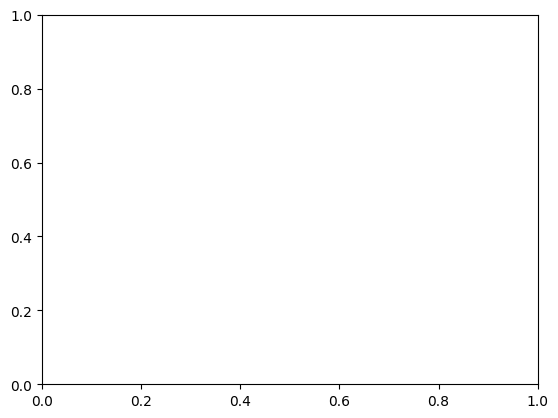

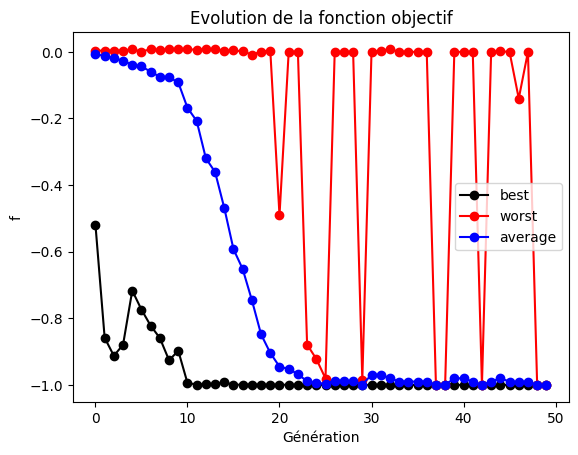

La valeur finale de la fonction objectif est :  -0.9999999999737691
Les variables de décision du meilleur individu de la population finale sont :  3.141596551370905  et  3.1415911388178706
Le nombre d'itérations est :  49
La précision de la moyenne est de :  -3.203588827549453e-08


In [62]:
fig, ax = plt.subplots()

# Initialisation de la population
initialisation(population, Npop)

#pop_anim.append(population.copy())

# Evaluation de la population
evaluation(population, best, worst, average, generation)

# Boucle principale

while not arret(best, worst, average, generation):
    # Incrémentation du nombre de génération
    generation.append(generation[-1] + 1)

    # Sélection des parents
    #selection_tournoi(population, Ntour)
    selection_classement(population, Npop, Sp)

    # Croisement
    croisement(population)

    # Mutation
    mutation(population, pmut, generation, xmax, xmin, Gmax)

    #pop_anim.append(population.copy())

    # Evaluation de la population
    evaluation(population, best, worst, average, generation)

# Animation de la population
#ani = FuncAnimation(fig, plot_population, frames=pop_anim, fargs=(generation, ax), interval=100, repeat=False)
#ani.save('evolution_population.gif', writer='pillow')

# afficher la courbe de best_f, worst_f, average_f
plt.figure()
plt.plot(generation,best,c = 'black',marker ='o')
plt.plot(generation,worst,c = 'red',marker = 'o')
plt.plot(generation,average,c = 'blue',marker = 'o')
plt.ylabel('f')
plt.xlabel('Génération')
plt.legend(['best','worst','average'])
plt.title('Evolution de la fonction objectif')
plt.show()

# affichage de la valeur finale de la fonction objectif et des variables de décision du meilleur individu de la population finale en combien d'itérations
population.sort(key=lambda individu: individu.f)
best_f = population[0]
print("La valeur finale de la fonction objectif est : ",best_f.f)
print("Les variables de décision du meilleur individu de la population finale sont : ",best_f.x[0]," et ",best_f.x[1])
print("Le nombre d'itérations est : ",generation[-1])
print("La précision de la moyenne est de : ", average[generation[-1]] - average[generation[-2]])